Tek değişkenli analiz yaparak verileri yorumlayın, önemli gördüğünüz noktaları belirtin.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

In [2]:
education_df = pd.read_csv('states_all.csv')

In [3]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate(limit_direction="both")

# we drop the null values after interpolation
education_df.dropna(inplace=True)

In [4]:
education_df.describe(include="all")

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,474,474,474.00,474.00,474.00,474.00,474.00,474.00,474.00,474.00,...,474.00,474.00,474.00,474.00,474.00,474.00,474.00,474.00,474.00,474.00
unique,473,51,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,2009_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,2,12,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,NaN,2008.31,937540.02,10686484.31,945489.79,4951213.73,4789780.77,10768333.45,5581537.56,...,72076.33,72381.07,64230.54,579931.70,284423.51,887069.56,236.54,279.51,219.31,263.77
std,NaN,NaN,6.10,1116716.66,13509959.95,1323975.90,6377841.21,6301760.57,13684809.54,7223257.09,...,86028.66,85377.75,77108.66,689004.75,338940.65,1054478.17,9.16,9.70,7.70,6.83
min,NaN,NaN,1992.00,44179.00,645233.00,41007.00,0.00,28531.00,638784.00,318260.00,...,3423.00,2860.00,2188.00,26762.00,9970.00,36823.00,187.13,232.83,178.56,236.38
25%,NaN,NaN,2005.00,275327.75,2692582.50,255225.25,1420027.50,943254.75,2632913.00,1406719.50,...,20433.50,20792.00,18503.25,165864.25,81630.50,259282.00,232.06,274.44,215.04,259.76
50%,NaN,NaN,2009.00,662538.00,6101099.00,549462.50,2999801.00,2425774.00,6197553.00,3171867.00,...,50773.50,49748.50,41298.50,405539.50,185144.00,624583.00,238.29,281.37,220.93,265.14
75%,NaN,NaN,2013.00,1014564.75,12168281.50,1023658.00,6086357.50,5358206.75,11729070.50,6090733.75,...,79576.00,80848.00,74952.00,639560.00,321904.00,970672.00,242.56,286.15,224.49,268.28


1. Average *TOTAL_REVENUE* is less than *TOTAL_EXPENDITURE*. This means that states run budget deficit on education on average.

2. *INSTRUCTION_EXPENDITURE* makes up almost half of the total expenditures on education.

3. *FEDERAL_REVENUE* is the major source of revenue on average.

4. Average math scores are higher than average reading scores but the standard deviation of the average math scores is also higher than the that of the average reading scores.

Bir eyaleti ele alın (ör: California) ve toplam gelirleri ile toplam harcamalarının yıllara göre değişiminin doğru grafiğini çizin. Bu iki değişken yıllara göre değişim göstermekte midir? Zirve ve dip yaptığı yıllar var mı?

In [6]:
x = education_df[education_df.STATE == "CALIFORNIA"]['YEAR']

In [7]:
y = education_df[education_df.STATE == "CALIFORNIA"]['TOTAL_EXPENDITURE']

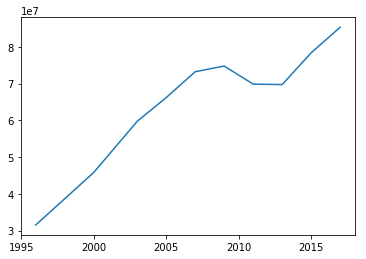

In [8]:
plt.plot(x,y)
plt.show()

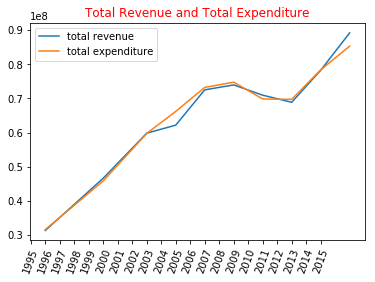

In [14]:
plt.plot(education_df.loc[education_df.STATE == "CALIFORNIA", "YEAR"],
         education_df.loc[education_df.STATE == "CALIFORNIA", "TOTAL_REVENUE"], label="total revenue")

plt.plot(education_df.loc[education_df.STATE == "CALIFORNIA", "YEAR"],
         education_df.loc[education_df.STATE == "CALIFORNIA", "TOTAL_EXPENDITURE"], label="total expenditure")

Baslik=plt.title("Total Revenue and Total Expenditure")
plt.setp(Baslik, color='r')
plt.xticks(range(1995, 2016), rotation=70)
plt.legend()
plt.show()

Seçtiğiniz eyalette, öğrenciler hangi derste daha başarılı? Matematik mi yoksa okuma mı?

In [15]:
education_df["FARK_4"] = education_df.AVG_READING_4_SCORE - education_df.AVG_MATH_4_SCORE
education_df["FARK_8"] = education_df.AVG_READING_8_SCORE - education_df.AVG_MATH_8_SCORE

In [16]:
x = education_df[education_df.STATE == "CALIFORNIA"][['YEAR', 'FARK_4']].dropna().YEAR

In [17]:
y = education_df[education_df.STATE == "CALIFORNIA"][['YEAR', 'FARK_4']].dropna().FARK_4

([<matplotlib.axis.XTick at 0x8dc27f0>,
 <a list of 22 Text xticklabel objects>)

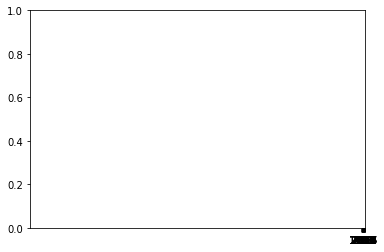

In [18]:
plt.xticks(np.arange(min(x), max(x)+1, 1.0))

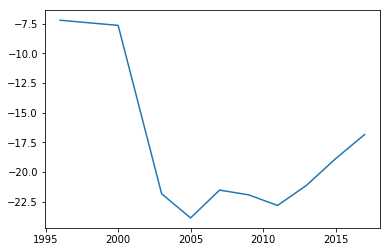

In [20]:
plt.plot(x,y)
plt.show()

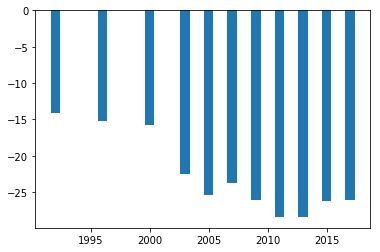

In [21]:
plt.bar(education_df.YEAR, education_df.FARK_4)
plt.show()

In [22]:
education_df[education_df.STATE == "CALIFORNIA"].plot.bar(['YEAR'], ['FARK_4'])

ValueError: x must be a label or position

TypeError: <lambda>() missing 1 required positional argument: 'height'

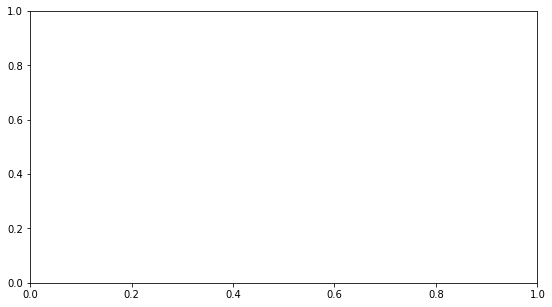

In [23]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.bar(x,
         )

plt.title("reading ve math farkı (4)")

plt.subplot(1,2,2)
plt.bar(education_df.loc[education_df.STATE == "CALIFORNIA", "YEAR"],
         education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_READING_8_SCORE"] - education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_MATH_8_SCORE"])

plt.title("reading ve math farkı  (8)")

plt.show()

print("reading ve math farkı  (4)")
print(education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_READING_4_SCORE"] - education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_MATH_4_SCORE"])
print("reading ve math farkı  (8)")
print(education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_READING_8_SCORE"] - education_df.loc[education_df.STATE == "CALIFORNIA", "AVG_MATH_8_SCORE"])

Matematik ve okuma notlarının dağılımı nedir?

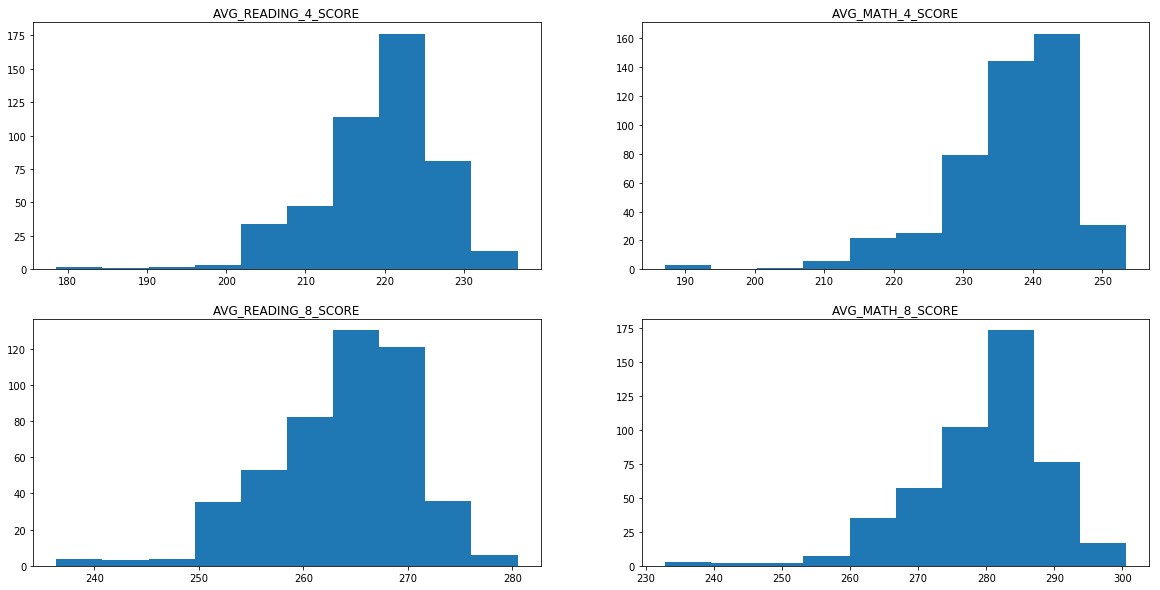

In [24]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(education_df.AVG_READING_4_SCORE.dropna())
plt.title("{}".format("AVG_READING_4_SCORE"))

plt.subplot(2,2,2)
plt.hist(education_df.AVG_MATH_4_SCORE.dropna())
plt.title("{}".format("AVG_MATH_4_SCORE"))

plt.subplot(2,2,3)
plt.hist(education_df.AVG_READING_8_SCORE.dropna())
plt.title("{}".format("AVG_READING_8_SCORE"))

plt.subplot(2,2,4)
plt.hist(education_df.AVG_MATH_8_SCORE.dropna())
plt.title("{}".format("AVG_MATH_8_SCORE"))
plt.show()

Dağılımlar normal dağlım değil, sola eğilimli. Bu durum da bize okuma ve yazma notlarının ortalamasının mediandan daha düşük olduğunu gösteriyor.

Matematik ve okuma notlarında birçok eksik değer olduğunu farketmişsinizdir. Eksik değerleri ortalama, medyan ve enterpolasyon ile tamamlayın. Bu tekniklerin notların dağılımı üzerindeki etkisini karşılaştırın.

In [26]:
education_df = pd.read_csv('states_all.csv')
states = education_df["STATE"].unique()

In [27]:
orjinal_MATH_4 = education_df.AVG_MATH_4_SCORE.dropna()
interpolate_MATH_4 = education_df.AVG_MATH_4_SCORE.interpolate()
median_MATH_4 = education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.median())
mean_MATH_4 = education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.mean())

In [28]:
orjinal_READING_4 = education_df.AVG_READING_4_SCORE.dropna()
interpolate_READING_4 = education_df.AVG_READING_4_SCORE.interpolate()
median_READING_4 = education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.median())
mean_READING_4 = education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.mean())

In [29]:
orjinal_MATH_8 = education_df.AVG_MATH_8_SCORE.dropna()
interpolate_MATH_8 = education_df.AVG_MATH_8_SCORE.interpolate()
median_MATH_8 = education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.median())
mean_MATH_8 = education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.mean())

In [30]:
orjinal_READING_8 = education_df.AVG_READING_8_SCORE.dropna()
interpolate_READING_8 = education_df.AVG_READING_8_SCORE.interpolate()
median_READING_8 = education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.median())
mean_READING_8 = education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.mean())

ValueError: max must be larger than min in range parameter.

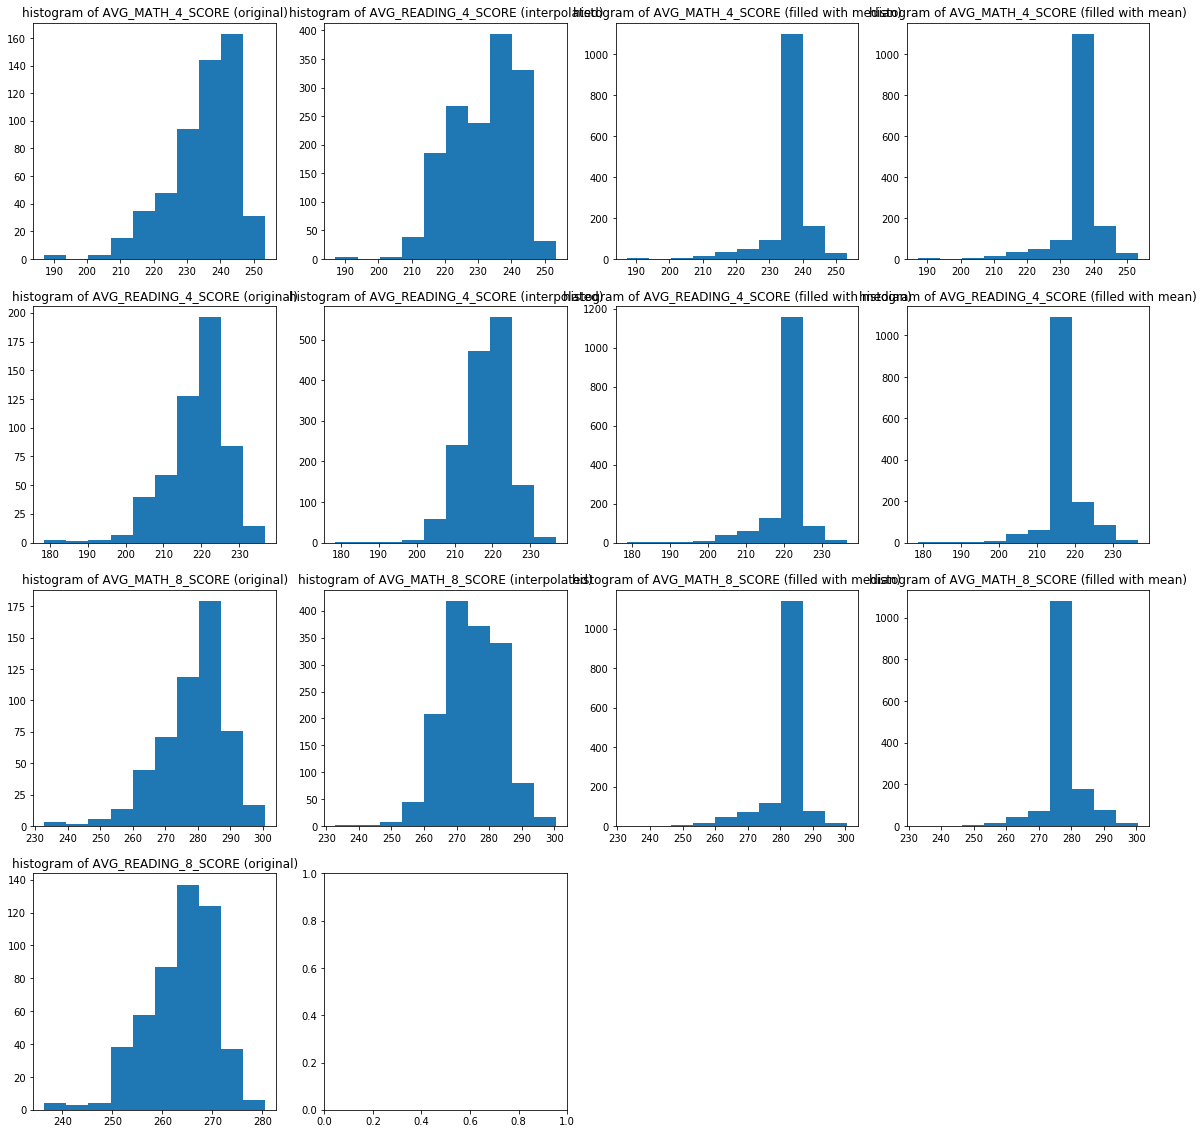

In [31]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(orjinal_MATH_4)
plt.title("histogram of {} (original)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,2)
plt.hist(interpolate_MATH_4)
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,3)
plt.hist(median_MATH_4)
plt.title("histogram of {} (filled with median)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,4)
plt.hist(mean_MATH_4)
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,5)
plt.hist(orjinal_READING_4)
plt.title("histogram of {} (original)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,6)
plt.hist(interpolate_READING_4)
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,7)
plt.hist(median_READING_4)
plt.title("histogram of {} (filled with median)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,8)
plt.hist(mean_READING_4)
plt.title("histogram of {} (filled with mean)".format("AVG_READING_4_SCORE"))


plt.subplot(4,4,9)
plt.hist(orjinal_MATH_8)
plt.title("histogram of {} (original)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,10)
plt.hist(interpolate_MATH_8)
plt.title("histogram of {} (interpolated)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,11)
plt.hist(median_MATH_8)
plt.title("histogram of {} (filled with median)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,12)
plt.hist(mean_MATH_8)
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,13)
plt.hist(orjinal_READING_8)
plt.title("histogram of {} (original)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,14)
plt.hist(interpolate_READING_8)
plt.title("histogram of {} (interpolated)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,15)
plt.hist(median_READING_8)
plt.title("histogram of {} (filled with median)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,16)
plt.hist(mean_READING_8)
plt.title("histogram of {} (filled with mean)".format("AVG_READING_8_SCORE"))

plt.tight_layout()
plt.show()